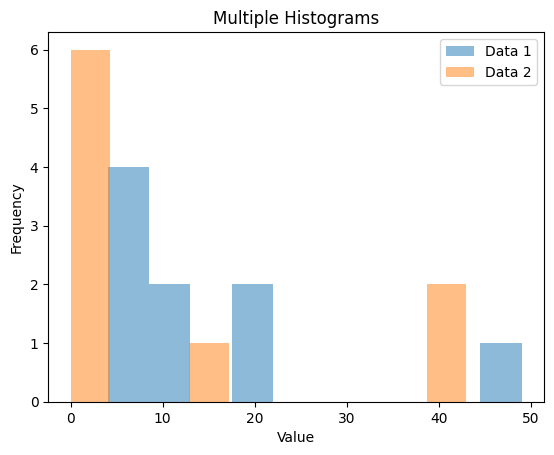

In [1]:
# X1 = [12,5,11,11,9,18]
# X2 = [7,3,4,6,3,13]
import matplotlib.pyplot as plt

TV_FAVORABLE = [12,4,5,20,5,5,20,10,49]
TV_UNFAVORABLE = [43,14,42,1,2,0,1,0,0]

# Create multiple histograms
plt.hist(TV_FAVORABLE, alpha=0.5, label='Data 1')
plt.hist(TV_UNFAVORABLE, alpha=0.5, label='Data 2')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Multiple Histograms')

# Add legend
plt.legend()

# Show the plot
plt.show()

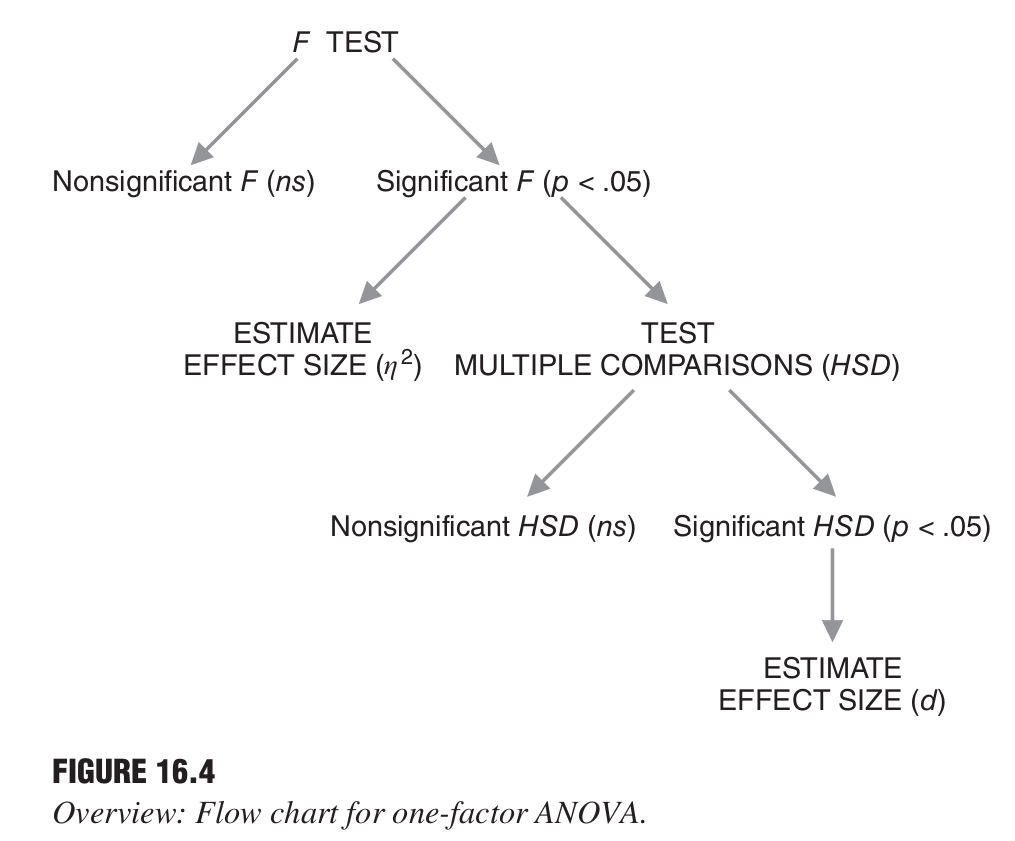

In [2]:
from IPython.display import Image
image_path = "stat_infographic/Statistics_Flowchart_one_factor_ANOVA.png"
Image(filename=image_path)

In [3]:
def SS_Terms_Repeated_ANOVA(the_data,alpha):
    import statistics,math,numpy
    from scipy.stats import f
    import statsmodels.stats.libqsturng as qsturng

    joined_data = numpy.concatenate(the_data)
    print(f'joined_data = {joined_data}')

    k = len(the_data)
    print(f'k = {k}')

    N = len(joined_data)
    print(f'N = {N}')

    n = len(the_data[0])
    print(f'n = {n}')

    df_total = N-1
    print(f'df_total = {df_total}')

    df_between = k-1
    print(f'df_between = {df_between}')

    df_within = N-k
    print(f'df_within = {df_within}')

    df_subject = n-1
    print(f'df_subject = {df_subject}')

    df_error = df_within - df_subject
    print(f'df_error = {df_error}')
    
    T = [sum(data) for data in the_data]
    print(f'T = {T}')

    G = sum(T)
    print(f'G = {G}')

    T_sq_over_n = [round(t**2/n,3) for t in T]
    print(f'T_sq_over_n = {T_sq_over_n}')

    G_sq_over_N = G**2/N
    print(f'G_sq_over_N = {G_sq_over_N}')

    SS_between = round(sum(T_sq_over_n) - G_sq_over_N,3)
    print(f'SS_between = {SS_between}')

    sum_X_sq = sum([num**2 for num in joined_data])
    print(f'sum_X_sq = {sum_X_sq}')

    SS_within = round(sum_X_sq - sum(T_sq_over_n),3)
    print(f'SS_within = {SS_within}')

    # Subjects
    subjects = []
    n = 0
    while n < len(the_data[0]):
        temp = []
        subjects.append(temp)
        for i in range(len(the_data)):
            temp.append(the_data[i][n])
        n+=1
    print(f'subjects = {subjects}')

    subject_totals = [sum(list) for list in subjects]
    print(f'subject_totals = {subject_totals}')

    T_sq_subject = [round(num**2/k,3) for num in subject_totals]
    print(f'T_sq_subject = {T_sq_subject}')

    SS_subject = round(sum(T_sq_subject) - G_sq_over_N,3)
    print(f'SS_subject = {SS_subject}')

    SS_error = round(SS_within - SS_subject,3)
    print(f'SS_error = {SS_error}')

    SS_total = sum_X_sq - G_sq_over_N
    print(f'SS_total = {SS_total}')

    MS_between = SS_between/df_between
    print(f'MS_between = {MS_between}')

    MS_error = round(SS_error/df_error,3)
    print(f'MS_error = {MS_error}')

    F_ratio = round(MS_between/MS_error,3)
    print(f'F_ratio = {F_ratio}')

    F_critical_value = round(f.ppf(1 - alpha, df_between, df_error),3)
    print(f'F_critical_value = {F_critical_value}')

    if F_ratio >= F_critical_value:
        print(f'F_ratio = {F_ratio} is GREATER or EQUAL to F_critical_value = {F_critical_value}, therefore we will REJECT the Null Hypothesis')
    else:
        print(f'F_ratio = {F_ratio} is LESS than the F_critical_value = {F_critical_value}, therefore we will RETAIN the Null Hypothesis')

    eta_sq_p = round(SS_between/(SS_between + SS_error),3)
    print(f'proportion of explained variance = {eta_sq_p}')

    means = [round(statistics.mean(list),3) for list in the_data]
    print(f'means = {means}')

    q = round(qsturng.qsturng(1 - alpha, k, df_error),3)
    print(f'q = {q}')

    HSD = round(q*((MS_error/n)**0.5),3)
    print(f'HSD = {HSD}')
    
    means_list = list(set(means))

    Cohens_ds = [round(((max(means)-means_list[n])/MS_error**0.5),3) for n in range(1,len(means_list))]
    print(f"Cohen's_ds = {Cohens_ds}")
    

X0 = [0,4,2]
X24 = [3,6,6]
X48 = [6,8,10]
a = [X0,X24,X48]
SS_Terms_Repeated_ANOVA(a,0.05)
print('===========')
# Using SLEEP-DEPRIVATION EXPERIMENT: REPEATED MEASURES (means)
MS_error = 1.0
d48_0 = 6/(MS_error**0.5)
d48_24 = 3/(MS_error**0.5)
print(f'd48_0 = {d48_0}\nd48_24 = {d48_24}')

joined_data = [ 0  4  2  3  6  6  6  8 10]
k = 3
N = 9
n = 3
df_total = 8
df_between = 2
df_within = 6
df_subject = 2
df_error = 4
T = [6, 15, 24]
G = 45
T_sq_over_n = [12.0, 75.0, 192.0]
G_sq_over_N = 225.0
SS_between = 54.0
sum_X_sq = 301
SS_within = 22.0
subjects = [[0, 3, 6], [4, 6, 8], [2, 6, 10]]
subject_totals = [9, 18, 18]
T_sq_subject = [27.0, 108.0, 108.0]
SS_subject = 18.0
SS_error = 4.0
SS_total = 76.0
MS_between = 27.0
MS_error = 1.0
F_ratio = 27.0
F_critical_value = 6.944
F_ratio = 27.0 is GREATER or EQUAL to F_critical_value = 6.944, therefore we will REJECT the Null Hypothesis
proportion of explained variance = 0.931
means = [2, 5, 8]
q = 5.033
HSD = 2.906
Cohen's_ds = [6.0, 3.0]
d48_0 = 6.0
d48_24 = 3.0


In [4]:
def TWO_FACTOR_ANOVA(your_data,rows,columns,n):
    print(f'your_data = {your_data}')

    # T_cell
    T_cell_squared = [round(((sum(item))**2)/n,3) for item in your_data]
    print(f'T_cell_squared = {T_cell_squared}')
    
    # Grand Total (G)
    G_data = [n for sublist in your_data for n in sublist]
    G = sum(G_data)
    print(f'G = {G}')
    
    # Number of items in data (N)
    N = len(G_data)
    print(f'N = {N}')

    print('\n')
    
    # SS_total
    SS_total = round(sum([num**2 for num in G_data]) - G**2/N,3)
    print(f'SS_total = {SS_total}')

    # SS_between
    SS_between = round(sum(T_cell_squared) - (G**2/N),3)
    print(f'SS_between = {SS_between}')

    # SS_within
    SS_within = round(sum([num**2 for num in G_data]) - sum(T_cell_squared),3)
    print(f'SS_within = {SS_within}')
    
    print(f'\n')

    # ROW MANIPULATION
    print('ROWS')
    row_totals = []
    for i in range(0,len(your_data),columns):
        row_data = your_data[i:i+columns]
        row_numbers = [num for sublist in row_data for num in sublist]
        row_totals.append(sum(row_numbers))
    print(f'row_totals = {row_totals}')
    print('\n')

    # COLUMN MANIPULATION
    print('COLUMNS')
    column_totals = []
    for i in range(columns):
        column_data = []
        index = 0
        j = 0
        while j != rows:  
            column_data.append(sum(your_data[i]))
            i+=columns
            j+=1
            print(f'i={i}; j={j}')
        column_data_sum = sum(column_data)
        column_totals.append(column_data_sum)
    print(f'column_totals = {column_totals}')

    print('\n')
    
    # SS_column
    SS_column = round(sum([(num**2)/(rows*n) for num in column_totals]) - G**2/N,3)
    print(f'SS_column = {SS_column}')

    # SS_row
    SS_row = round(sum([(num**2)/(columns*n) for num in row_totals]) - G**2/N,3)
    print(f'SS_row = {SS_row}')

    # SS_interaction
    SS_interaction = round(SS_between - (SS_column + SS_row),3)
    print(f'SS_interaction = {SS_interaction}')

    print('\n')
    # df Terms
    df_total = N - 1
    df_column = columns - 1
    df_row = rows - 1
    df_interaction = df_column*df_row
    df_within = N - (columns*rows)
    print(f'df_total = {df_total}; df_column = {df_column}; df_row = {df_row}; df_interaction = {df_interaction}; df_within = {df_within}')

    print('\n')
    # Mean Squares
    MS_column = round(SS_column/df_column,3)
    MS_row = round(SS_row/df_row,3)
    MS_interaction = round(SS_interaction/df_interaction,3)
    MS_within = round(SS_within/df_within,3)
    print(f'MS_column = {MS_column}; MS_row = {MS_row}; MS_interaction = {MS_interaction}; MS_within = {MS_within}')

    print('\n')
    # F Ratios
    F_column = round(MS_column/MS_within,3)
    F_row = round(MS_row/MS_within,3)
    F_interaction = round(MS_interaction/MS_within,3)
    print(f'F_column = {F_column}; F_row= {F_row}; F_interaction= {F_interaction}')

In [5]:
X0 = [0,1,0,0]
X1 = [1,0,1,1]
X2 = [3,5,6,2]
X3 = [6,9,6,10]
X_total = [X0,X1,X2,X3]
rows = 2
columns = 3
n = 2
TWO_FACTOR_ANOVA(X_total,rows,columns,n)

your_data = [[0, 1, 0, 0], [1, 0, 1, 1], [3, 5, 6, 2], [6, 9, 6, 10]]
T_cell_squared = [0.5, 4.5, 128.0, 480.5]
G = 51
N = 16


SS_total = 168.438
SS_between = 450.938
SS_within = -282.5


ROWS
row_totals = [20, 31]


COLUMNS
i=3; j=1
i=6; j=2
i=4; j=1


IndexError: list index out of range

In [ ]:
danger_zero = [8,8]
danger_two = [8,6]
danger_four = [10,8]
non_danger_zero = [9,11]
non_danger_two = [15,19]
non_danger_four = [24,18]
danger_data = [danger_zero,danger_two,danger_four,non_danger_zero,non_danger_two,non_danger_four]
rows3 = 2
columns3 = 3
n = 2
TWO_FACTOR_ANOVA(danger_data,rows3,columns3,n)

In [ ]:
a1 = [6,4,5,3]
a2 = [5,3,3,6]
a3 = [4,2,3,8]
a4 = [2,3,2,2]

b1 = [5,4,5,4]
b2 = [4,3,2,3]
b3 = [3,2,3,4]
b4 = [2,1,2,1]

c1 = [4,3,4,2]
c2 = [4,2,3,1]
c3 = [3,2,2,5]
c4 = [1,2,1,3]

d1 = [4,3,4,2]
d2 = [4,2,3,1]
d3 = [3,2,2,5]
d4 = [1,2,1,3]

rows2 = 4
columns2 = 4
n = 4
data2 = [a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,d1,d2,d3,d4]
TWO_FACTOR_ANOVA(data2,rows2,columns2,n)

In [ ]:
zero_zero_c = [6,4,5]
zero_500_c = [5,3,3]
zero_thousand_c = [4,2,3]
zero_1500_c = [2,3,2]

half_zero_c = [5,4,5]
half_500_c = [4,3,2]
half_thousand_c = [3,2,3]
half_1500_c = [2,1,2]

one_zero_c = [4,3,4]
one_500_c = [4,2,3]
one_thousand_c = [3,2,2]
one_1500_c = [1,2,1]
data = [zero_zero_c,zero_500_c,zero_thousand_c,zero_1500_c,half_zero_c,half_500_c,half_thousand_c,half_1500_c,one_zero_c,one_500_c,one_thousand_c,one_1500_c]
r = 3
c = 4
n = 3
TWO_FACTOR_ANOVA(data,r,c,n)

In [10]:
import statsmodels.stats.libqsturng as qsturng
# from qsturng import qsturng

# Given values
df_within = 8  # Degrees of freedom within groups
k = 4          # Total number of cells
alpha = 0.05   # Significance level

q = round(qsturng.qsturng(1 - alpha, k, df_within),3)
print(f'q = {q}')

q = 4.529
